Entropy (Sự hỗn loạn về dữ liệu):

Sự hỗn loạn về dữ liệu sẽ làm cho thông tin bị vẫn đục, bị hỗn loạn, dễ bị nhiễu, chứa nhiều thông tin, thông tin rất đa dạng => khó đưa ra quyết định

Sự hỗn loạn thấp: thì khi đó chất lượng dữ liệu càng tinh khiết nhưng ngược lại sự đa dạng về thông tin sẽ giảm dần => dễ đưa ra quyết định

Công thức: E(S) = Tổng(-pi.log2(pi))

Giả sử 7 đổ 3 xanh: Entropy = -(0.7).log2(0.7) - (0.3).log2(0.3)


Information Gain (IG): là một hàm số biểu diễn mức độ giảm xuống của entropy, mức độ giảm càng cao thì entropy mới sẽ cằng thấp => dễ đưa ra quyết định. Đây chính là mấu chốt của các giải thuật trong decision tree 



Như vậy để chọn lựa đặc trưng dùng để phân chia lựa chọn trong cây quyết định ta sẽ so sánh IG của chúng và chọn lựa IG cao nhất

Trong các giải thuật decision tree thường có đặc trưng tham lam, khi entropy còn cao thì tiếp tục chia tiếp, cho tới lúc tất cả các node lá sẽ khớp hết với tập dữ liệu lịch sử, hay nói cách khác mô hình học quá kĩ với tập dữ liệu gọi là overfitting

Một trong những vấn đề của cây là cần tìm điểm dừng để cây có chiều cao vừa phải nhằm thể hiện đucợ sự tổng quát hóa về tri thức rút trích được trong tập dữ liệu

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
import pandas as pd 
df = pd.read_excel("lophoc.xlsx" )
df

,Sức khỏe,Thời tiết,Kết quả
0,ốm,u ám,nghỉ
1,ốm,mưa,nghỉ
2,ốm,nắng,nghỉ
3,ốm,u ám,học
4,tốt,u ám,học
5,tốt,mưa,học
6,tốt,nắng,nghỉ


In [3]:
#Tập dữ liệu input (Đặc trung) và output (mục tiêu)
# Cắt dữ liệu làm hai phần
x = df.iloc[:,:-1] 
# x => input
y = df.iloc[:, -1]
# y => output

In [4]:
# Chuyển dạng chuỗi sang số
# Mã hóav input => encoder => model
from sklearn.preprocessing import LabelEncoder

encHealth = LabelEncoder()
x['Sức khỏe'] = encHealth.fit_transform(x['Sức khỏe'])

encWeather = LabelEncoder()
x['Thời tiết'] = encWeather.fit_transform(x['Thời tiết'])

x

C:\Users\FPT-ACER\AppData\Local\Temp\ipykernel_10960\3631227280.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sức khỏe'] = encHealth.fit_transform(x['Sức khỏe'])
C:\Users\FPT-ACER\AppData\Local\Temp\ipykernel_10960\3631227280.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Thời tiết'] = encWeather.fit_transform(x['Thời tiết'])


,Sức khỏe,Thời tiết
0,1,2
1,1,0
2,1,1
3,1,2
4,0,2
5,0,0
6,0,1


In [5]:
# Sức khỏe : 1 => ốm, 0 => tốt
# Thời tiết : 1 => nắng , 0 => mưa, 2 => u ám

In [6]:
#Split data set into training test and test set
# Cắt dữ liệu ra 20:80
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=34)

In [8]:
X_train

,Sức khỏe,Thời tiết
4,0,2
6,0,1
5,0,0
2,1,1
1,1,0


In [17]:
y_train

4     học
6    nghỉ
5     học
2    nghỉ
1    nghỉ
Name: Kết quả, dtype: object

In [9]:
# Create Decision tree classifer object
modelDT = DecisionTreeClassifier(criterion="entropy", max_depth=3)

#  max_depth=3 chia đồ cao là 3
#train decision tree classifer
modelDT = modelDT.fit(X_train, y_train)

In [10]:
modelDT.classes_
# Xem thứ tự

array(['học', 'nghỉ'], dtype=object)

Matplotlib created a temporary cache directory at C:\Users\FPT-ACER\AppData\Local\Temp\matplotlib-4pzku86j because the default path (C:\Users\FPT-ACER\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


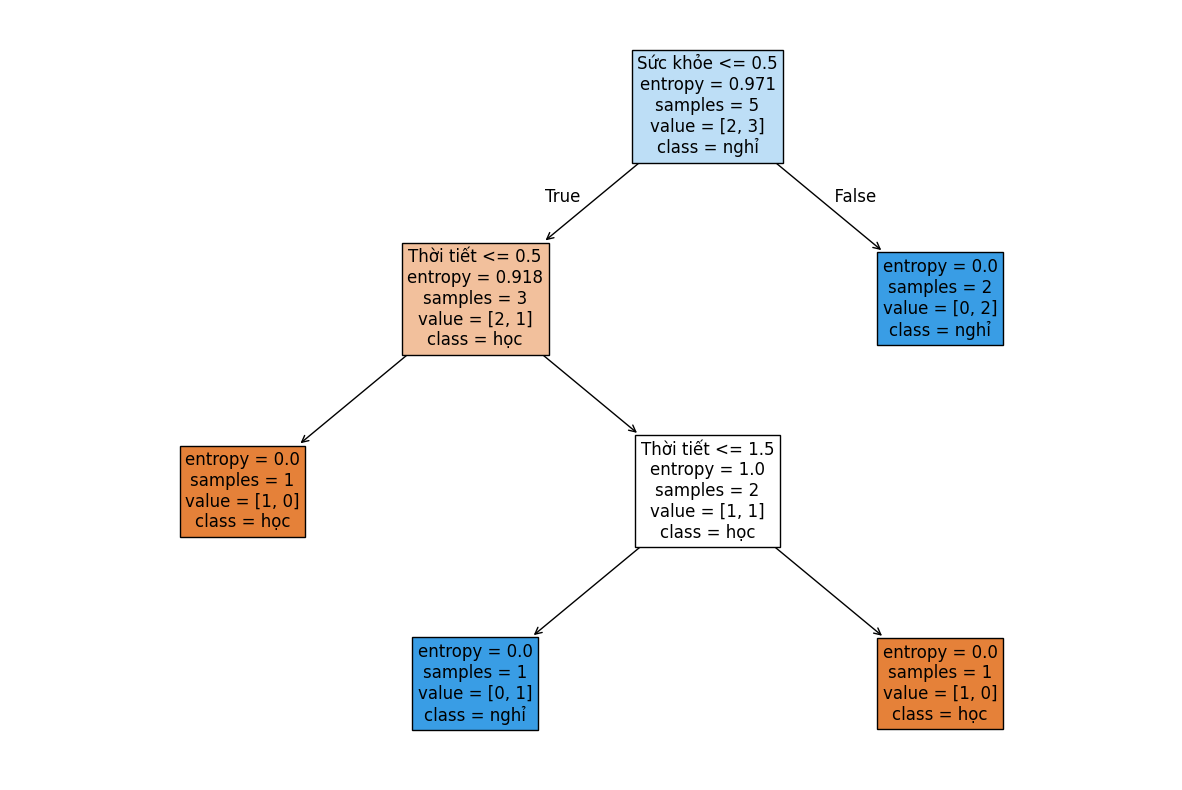

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_cols = X_train.columns

plt.figure(figsize=(15, 10))
plot_tree(modelDT, feature_names=feature_cols, class_names=modelDT.classes_, fontsize = 12, filled = True)
plt.show()

IG = 0 có nghĩa rằng không thu được thông tin gì khi thực hiện phép chia, hay thực hiện phép phân nhánh trên cây quyết định

### Đánh giá mô hình


In [12]:
# Predict the response for test dataset
y_test_pred = modelDT.predict(X_test)

#Model accuracy, how often is the calssifier correct
print("Accuracy", metrics.accuracy_score(y_test, y_test_pred))

Accuracy 0.5


In [13]:
# accuracy 50 % chưa ứng dụng được thực thế
# thực tế trên 90%

In [14]:
#Tạo confusion metric
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_test_pred)
cf_matrix

array([[0, 1],
       [0, 1]])

Btap như tuần 6

### Xây dựng dự báo

In [15]:
import numpy as np

In [16]:
#Prediction

health = 'ốm'
health_scaled = encHealth.transform([health])

weather = 'nắng'
weather_scaled = encWeather.transform([weather])

feature_sample = np.array([health_scaled[0], weather_scaled[0]])

y_sample_pred = modelDT.predict([feature_sample])
y_sample_pred

c:\Users\FPT-ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['nghỉ'], dtype=object)